In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train[10],y_train[0]

(array([[[53, 65, 53],
         [54, 63, 52],
         [56, 60, 50],
         ...,
         [47, 51, 50],
         [41, 45, 44],
         [24, 28, 27]],
 
        [[46, 59, 41],
         [53, 62, 45],
         [54, 59, 44],
         ...,
         [42, 46, 45],
         [39, 43, 42],
         [28, 32, 31]],
 
        [[45, 59, 38],
         [50, 60, 41],
         [46, 52, 34],
         ...,
         [38, 42, 41],
         [36, 40, 39],
         [29, 33, 32]],
 
        ...,
 
        [[71, 83, 66],
         [74, 83, 66],
         [80, 85, 67],
         ...,
         [51, 54, 33],
         [46, 49, 34],
         [49, 50, 41]],
 
        [[75, 82, 67],
         [79, 85, 69],
         [81, 85, 67],
         ...,
         [61, 65, 41],
         [64, 67, 48],
         [48, 50, 41]],
 
        [[85, 83, 71],
         [85, 84, 71],
         [86, 86, 70],
         ...,
         [61, 65, 39],
         [64, 67, 46],
         [49, 50, 41]]], dtype=uint8), array([6], dtype=uint8))

In [ ]:
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

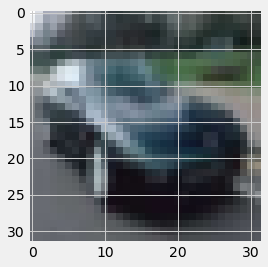

In [ ]:
img=plt.imshow(x_train[11000])

In [ ]:
y_train[11000]

array([1], dtype=uint8)

In [ ]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classification[y_train[11000][0]]

'automobile'

In [ ]:
y_train_onehot=to_categorical(y_train)
y_test_onehot=to_categorical(y_test)

In [ ]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_onehot[11000]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[11000]

array([[[1.        , 1.        , 1.        ],
        [0.85882353, 0.87058824, 0.89803922],
        [0.65490196, 0.67058824, 0.7254902 ],
        ...,
        [0.26666667, 0.29411765, 0.27843137],
        [0.23137255, 0.25490196, 0.24705882],
        [0.20392157, 0.22745098, 0.21960784]],

       [[0.94117647, 0.95294118, 0.96470588],
        [0.8       , 0.81960784, 0.85098039],
        [0.6       , 0.62745098, 0.67843137],
        ...,
        [0.25490196, 0.28627451, 0.2745098 ],
        [0.24313725, 0.26666667, 0.25882353],
        [0.23529412, 0.25882353, 0.25098039]],

       [[0.81960784, 0.83529412, 0.87058824],
        [0.67843137, 0.70588235, 0.74509804],
        [0.50196078, 0.54117647, 0.58039216],
        ...,
        [0.18039216, 0.21568627, 0.20392157],
        [0.18823529, 0.21176471, 0.20392157],
        [0.2       , 0.22352941, 0.21568627]],

       ...,

       [[0.40392157, 0.41568627, 0.44313725],
        [0.40392157, 0.41568627, 0.44313725],
        [0.4       , 0

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train,y_train_onehot,
               batch_size=256,
               epochs=10,
               validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 329ms/step - loss: 1.7598 - accuracy: 0.3424 - val_loss: 1.4755 - val_accuracy: 0.4560
Epoch 2/10
157/157 [==============================] - 51s 328ms/step - loss: 1.3825 - accuracy: 0.4951 - val_loss: 1.2807 - val_accuracy: 0.5384
Epoch 3/10
157/157 [==============================] - 51s 327ms/step - loss: 1.2493 - accuracy: 0.5518 - val_loss: 1.1787 - val_accuracy: 0.5845
Epoch 4/10
157/157 [==============================] - 51s 327ms/step - loss: 1.1408 - accuracy: 0.5911 - val_loss: 1.0842 - val_accuracy: 0.6121
Epoch 5/10
157/157 [==============================] - 51s 326ms/step - loss: 1.0518 - accuracy: 0.6269 - val_loss: 1.0422 - val_accuracy: 0.6283
Epoch 6/10
157/157 [==============================] - 51s 327ms/step - loss: 0.9811 - accuracy: 0.6529 - val_loss: 1.0327 - val_accuracy: 0.6434
Epoch 7/10
157/157 [==============================] - 51s 327ms/step - loss: 0.9163 - accuracy: 0.6763 - val_loss: 0.9863 - val_ac

In [ ]:
model.evaluate(x_test,y_test_onehot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.9085 - accuracy: 0.6849


0.6848999857902527

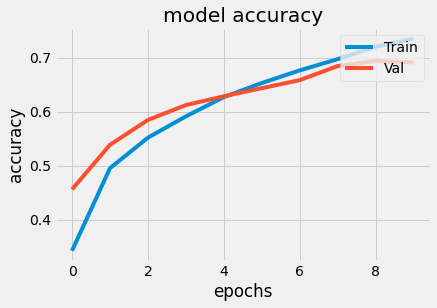

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving frog.jpg to frog.jpg


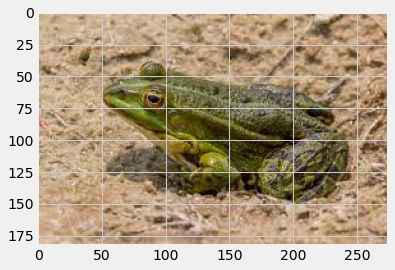

In [ ]:
newimage=plt.imread('frog.jpg')
img=plt.imshow(newimage)

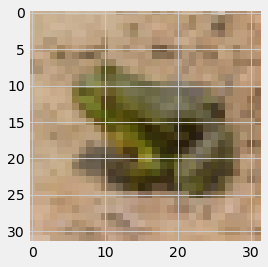

In [ ]:
from skimage.transform import resize
resizeimage=resize(newimage,(32,32,3))
img=plt.imshow(resizeimage)

In [ ]:
predictions=model.predict(np.array([x_test[50]]))
predictions

array([[1.5845709e-02, 1.9182942e-03, 6.1631788e-02, 8.2774665e-03,
        1.0999005e-03, 7.8862766e-03, 1.9562412e-03, 2.0128761e-01,
        2.5297093e-04, 6.9984376e-01]], dtype=float32)

In [ ]:
listindex=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][listindex[i]]>x[0][listindex[j]]:
      listindex[i],listindex[j]=listindex[j],listindex[i]
print(listindex)

[9, 7, 2, 0, 3, 5, 6, 1, 4, 8]


In [ ]:
for i in range(10):
  print(classification[listindex[i]],':',predictions[0][listindex[i]]*100,'%')

truck : 69.98437643051147 %
horse : 20.12876123189926 %
bird : 6.1631787568330765 %
airplane : 1.5845708549022675 %
cat : 0.8277466520667076 %
dog : 0.7886276580393314 %
frog : 0.19562412053346634 %
automobile : 0.1918294234201312 %
deer : 0.10999004589393735 %
ship : 0.02529709308873862 %


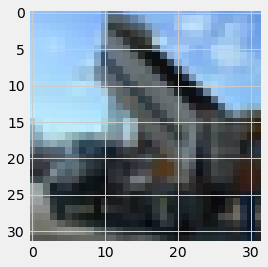

In [ ]:
plt.imshow(x_test[50])

In [ ]:
predictions=model.predict(np.array([resizeimage]))
predictions

array([[5.5644952e-05, 2.2509616e-04, 2.2816584e-03, 2.5372610e-03,
        1.5914497e-03, 5.5380625e-04, 9.9253792e-01, 5.9615054e-06,
        2.1213076e-05, 1.8992525e-04]], dtype=float32)

In [ ]:
listindex=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][listindex[i]]>x[0][listindex[j]]:
      listindex[i],listindex[j]=listindex[j],listindex[i]
print(listindex)

[6, 3, 2, 4, 5, 1, 9, 0, 8, 7]


In [ ]:
for i in range(1):
  print(classification[listindex[i]],':',predictions[0][listindex[i]]*100,'%')

frog : 99.25379157066345 %


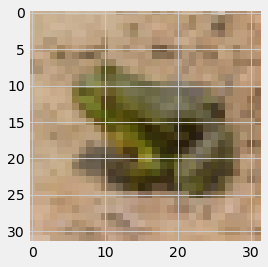

In [ ]:
plt.imshow(resizeimage)